# Project 4: [Insert Project Title]
## Clustering
---

In [33]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../data/clean_data/cleaned_data.csv")

### Preprocessing

In [60]:
X_num = df[['WEEKS_WRK', 'AGE', 'EARN_TOTAL', 'ADJ_GROSS_INC']]

In [61]:
ctx = ColumnTransformer([
    ('ss', StandardScaler(), ['WEEKS_WRK', 'AGE', 'EARN_TOTAL', 'ADJ_GROSS_INC']),
],verbose_feature_names_out = False)

In [62]:
ss = StandardScaler()

X_num_scaled = ss.fit_transform(X_num)
X_num_scaled = pd.DataFrame(X_num_scaled,columns = ss.get_feature_names_out())

In [63]:
X_num_scaled.head()

,WEEKS_WRK,AGE,EARN_TOTAL,ADJ_GROSS_INC
0,1.155748,0.160274,0.237757,0.076472
1,0.592845,1.021489,-0.462026,0.482889
2,1.155748,1.107611,0.297919,-0.420961
3,1.155748,-0.528699,0.171262,0.253993
4,0.834089,-0.614821,-0.145382,-0.420961


## Numreical Clustering
---

### KMeans

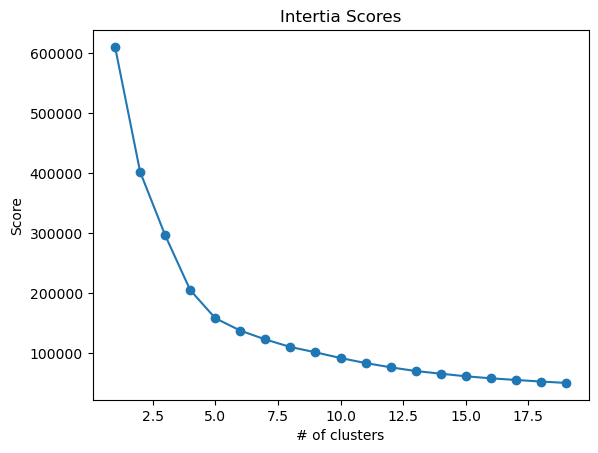

In [51]:
inertia_list = []

for k in range(1,20):
    kmeans = KMeans(n_clusters=k, random_state = 42)
    kmeans.fit(X_num_scaled)
    inertia_list.append(kmeans.inertia_)

plt.plot(range(1,20), inertia_list, marker = 'o')
plt.xlabel("# of clusters")
plt.ylabel("Score")
plt.title("Intertia Scores");

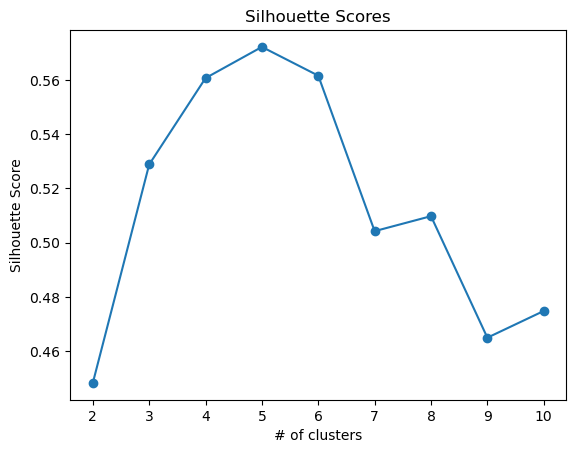

In [53]:
silhouette_list = []

for k in range(2,11):
    kmeans = KMeans(n_clusters=k,random_state = 42)
    kmeans.fit(X_num_scaled)
    silhouette_list.append(silhouette_score(X_num_scaled, kmeans.labels_))
    
plt.plot(range(2, 11), silhouette_list, marker = 'o')
plt.xlabel('# of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores');

In [55]:
kmeans = KMeans(n_clusters=5,random_state = 42)
kmeans.fit(X_num_scaled)
X_km = X.copy()
X_km['cluster'] = kmeans.labels_

## Categorical Clustering

### KModes

In [ ]:
#pip install --upgrade kmodes
#in terminal
#Source - https://pypi.org/project/kmodes/
'''
k-modes is used for clustering categorical variables.
It defines clusters based on the number of matching categories between data points.
(This is in contrast to the more well-known k-means algorithm, which clusters numerical data based on Euclidean distance.)
The k-prototypes algorithm combines k-modes and k-means and is able to cluster mixed numerical / categorical data.
'''

## Mixed Clusteing

### K-Prototype